<a href="https://colab.research.google.com/github/tashir0605/Cocepts-And-Practice/blob/main/Deep_Learning/Cats_Vs_Dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


In [3]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 98% 1.05G/1.06G [00:05<00:00, 166MB/s]
100% 1.06G/1.06G [00:05<00:00, 194MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense,MaxPooling2D,Conv2D,Flatten,Dropout,BatchNormalization
from keras import Sequential
import matplotlib.pyplot as plt

In [6]:
# generators
train_ds=keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
     label_mode = 'int', #this will assign dog as 0 and cat as or vice versa
    batch_size=32,
    image_size=(256,256)
)

val_ds=keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
     label_mode = 'int', #this will assign dog as 0 and cat as or vice versa
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [7]:
# Normalize

def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process) # jo hmara image hai wo 0 to 255 pixels ke beech ka ek numpy array hai and hum chahte hai ki wo 0 -1 ke beech me aa jaye
val_ds = val_ds.map(process)  # process function jb call ho rha hai to image and uska label ja rha hai and uske image numpy array ko 255 se divide kr diya and return kr diya



In [8]:
#create CNN model
model =Sequential()


In [9]:
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [11]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [12]:
history=model.fit(train_ds,epochs=10,validation_data=val_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 66s 87ms/step - accuracy: 0.5589 - loss: 2.1887 - val_accuracy: 0.5810 - val_loss: 0.7544
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 84ms/step - accuracy: 0.6191 - loss: 0.6453 - val_accuracy: 0.7140 - val_loss: 0.5657
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 87s 92ms/step - accuracy: 0.7175 - loss: 0.5548 - val_accuracy: 0.7282 - val_loss: 0.5654
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 85ms/step - accuracy: 0.7683 - loss: 0.4819 - val_accuracy: 0.7248 - val_loss: 0.5401
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 92ms/step - accuracy: 0.8067 - loss: 0.4076 - val_accuracy: 0.6676 - val_loss: 0.7183
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 85ms/step - accuracy: 0.8338 - loss: 0.3574 - val_accuracy: 0.8100 - val_loss: 0.4257
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 85ms/step - accuracy: 0.8700 - loss: 0.2899 - val_accuracy: 0.7554 - val_loss: 0.5492
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 85ms/step - accuracy: 0.8847 - loss: 0.2494 - 

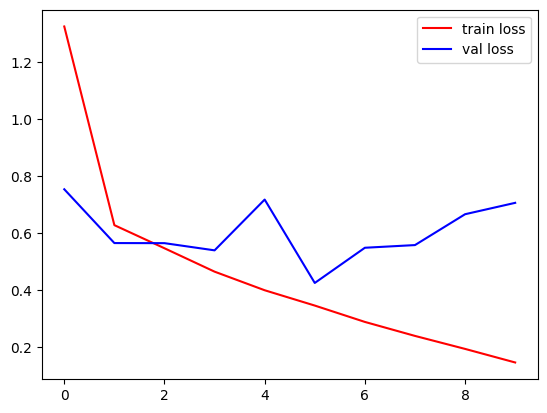

In [13]:
# plt.plot(history.history['loss'],color='red',label='train loss')
# plt.plot(history.history['val_loss'],color='blue',label='val loss')
# plt.legend()
# plt.show()

In [14]:
import cv2

In [15]:
test_img=cv2.imread('/content/dog.jpg')


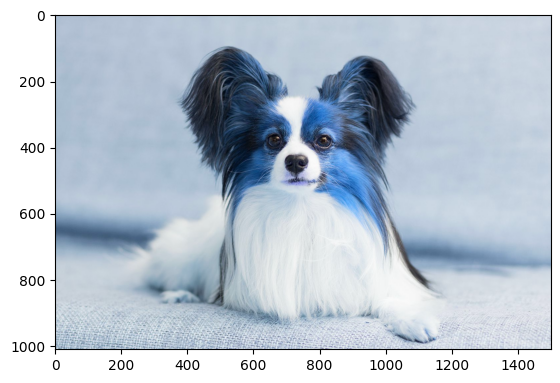

In [16]:
plt.imshow(test_img)

In [17]:
test_img.shape

(1010, 1500, 3)

In [19]:
test_img=cv2.resize(test_img,(256,256))
test_input=test_img.reshape((1,256,256,3)) # why 1,256 256 3 so in the first 1 is there because we have only image as batch

# mtlb ki iss batch me there is only one image

In [20]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 991ms/step


array([[1.]], dtype=float32)

In [21]:
test_img=cv2.imread('/content/cat.jpg')

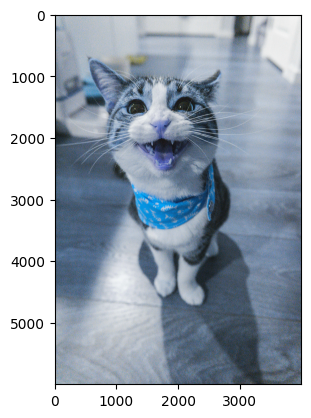

In [22]:
plt.imshow(test_img)

In [23]:
test_img.shape

(6000, 4000, 3)

In [24]:
test_img=cv2.resize(test_img,(256,256))
test_input=test_img.reshape((1,256,256,3))

In [25]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


array([[1.]], dtype=float32)